## Gather 

In this section I will be focussing on gathering data from various sources mentioned in the Project Details section

In [205]:
#Importing modules 

import pandas as pd 
import requests
import json
import numpy as np
import matplotlib.pyplot as plt 

In [206]:
#Reading from twitter-archive-enhanced.csv into a pandas dataframe 
tweet_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [207]:
#Reading from image_predictions.tsv into a pandas dataframe 
page = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [208]:
#Printing out certain attributes of response 
txt = page.text
print(len(txt))
print(page.headers['content-type'])

335079
text/tab-separated-values; charset=utf-8


In [209]:
#Writing the response to a file 
with open('image-predictions.tsv', mode = 'wb') as file: 
    file.write(page.content)

In [210]:
#read the file content from image-predictions.tsv to a pandas dataframe
image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [211]:
image_predictions_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [8]:
#Data from twitter 

import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [9]:
#https://stackoverflow.com/questions/47612822/how-to-create-pandas- -from-twitter-search-api
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in tweet_archive_df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)


Rate limit reached. Sleeping for: 710


In [10]:
print(len(list_of_tweets))

2337


In [11]:
print(list_of_tweets[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 892420639486877696, 'id_s

In [12]:
dict_list = [] 
for _ in list_of_tweets:
    dict_list.append(_)

In [13]:
print(dict_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 892420639486877696, 'id_s

In [14]:
#Write into a file tweet_json.txt
with open('tweet_json.txt', mode='w') as file: 
    file.write(json.dumps(dict_list,indent = 4))

In [212]:
#extract inly required columns and create a dataframe
list_of_other_features = [] 

with open('tweet_json.txt', encoding='utf-8') as json_file: 
    data = json.load(json_file)
    for tweet in data: 
        tweet_id = tweet['id']
        followers_count = tweet['user']['followers_count']
        favorites_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        
        list_of_other_features.append({('tweet_id'): str(tweet_id),
                                       ('followers_count'):str(followers_count),
                                       ('favorites_count'):int(favorites_count),
                                       ('retweet_count'):int(retweet_count)})

tweet_json = pd.DataFrame(list_of_other_features)
    

In [213]:
tweet_json.head()

,favorites_count,followers_count,retweet_count,tweet_id
0,37489,8104175,8170,892420643555336193
1,32240,8104175,6048,892177421306343426
2,24282,8104176,4001,891815181378084864
3,40826,8104176,8323,891689557279858688
4,39040,8104176,9018,891327558926688256


## Assess 

In this section, I will be looking out for quality and tidiness issues with the dataset.Doing so prepares this data for reliable analysis 



#### Visual Analysis 



In [214]:
tweet_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [215]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [216]:
tweet_json

,favorites_count,followers_count,retweet_count,tweet_id
0,37489,8104175,8170,892420643555336193
1,32240,8104175,6048,892177421306343426
2,24282,8104176,4001,891815181378084864
3,40826,8104176,8323,891689557279858688
4,39040,8104176,9018,891327558926688256
5,19618,8104176,2996,891087950875897856
6,11459,8104176,1984,890971913173991426
7,63234,8104176,18152,890729181411237888
8,26977,8104176,4113,890609185150312448
9,30914,8104176,7100,890240255349198849


#### Programmatic assessment 

#### Assessing tweet_archive_df  

In [217]:
#Displaying the first two rows of the twitter archive 
tweet_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [218]:
tweet_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [219]:
#Print a concise summary of the dataframe twitter_archive_df 
tweet_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Few of the columns have null values, datatype mismatch  

In [220]:
# Checking if all the tweet_ids are unique 

tweet_archive_df.tweet_id.nunique()

2356

In [221]:
#Value counts for the denominator 

In [222]:
tweet_archive_df.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [223]:
tweet_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Looks like there are a few denominators with values other than 10 

#### Assessing image_predictions_df 

In [224]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [225]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [226]:
image_predictions_df.tweet_id.nunique()

2075

In [227]:
# Combine the above two dataframes 

In [228]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 4 columns):
favorites_count    2337 non-null int64
followers_count    2337 non-null object
retweet_count      2337 non-null int64
tweet_id           2337 non-null object
dtypes: int64(2), object(2)
memory usage: 73.1+ KB


In [229]:
tweet_json.tweet_id.nunique()

2337

In [230]:
tweet_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [231]:
tweet_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [232]:
image_predictions_df.p1_dog.sum(), image_predictions_df.p2_dog.sum(), image_predictions_df.p3_dog.sum()


(1532, 1553, 1499)

In [233]:
image_predictions_df.jpg_url.duplicated().sum()

66

In [234]:
tweet_archive_df.name.value_counts().head()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Name: name, dtype: int64

In [235]:
tweet_archive_df.pupper.value_counts().head()

None      2099
pupper     257
Name: pupper, dtype: int64

In [236]:
tweet_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [237]:
tweet_archive_df.doggo.value_counts().head()

None     2259
doggo      97
Name: doggo, dtype: int64

In [238]:
tweet_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [239]:
tweet_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality issues 

1. A few columns in tweet_archive_df have missing values 
    - in_reply_to_status_id , in_reply_to_user_id (There are a few missing values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp too, since these values are not present for tweets that are original)
    
   
2. There are entries that are retweets in tweet_archive_df 

3. There are entries that do not have images (expanded_urls that are null)

4. There are denominators other than values that are 10 

5. Some names are wrong :Names that start with lower case letters are wrong(based on visual assessment)  


6. Erroneous datatype for timestamp 

7. Erroneous datatype on tweet_id

8. Missing tweet_ids 

9. 'None' in name column

### Tidiness issues 

1. Dataframes json_tweet and tweet_archive_df can be combined
2. Oggo, floofer, pupper and puppo columns can just be one 
3. Combine rating_numerator and rating_denominator to one column 
4. Drop unwanted columns 

# Cleaning 

In this section I will be defining each of the quality and tidiness issue and writing code to fix them. But first I will make copy of all the dataframes just to make sure that original data is not lost or altered 

In [240]:
tweet_archive_clean = tweet_archive_df.copy()
image_predictions_clean = image_predictions_df.copy() 
tweet_json_clean = tweet_json.copy()

### Quality Issues 

##### 1. A few columns in tweet_archive_df have missing values

#### Define 

Columns 'in_reply_to_status_id', 'in_reply_to_user_id' are not necessary for my analysis. I will be dropping these columns 

#### Code 

In [241]:
tweet_archive_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id'], inplace = True, axis = 1)

#### Test 

In [242]:
print(tweet_archive_clean.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


##### 2. There are entries that are retweets in tweet_archive_df 

#### Define 

Original tweets are the ones without retweet_status_id. Drop the ones with non-null entries of retweet_status_id 

Also make sure that entries 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp'are consistent in indicating if the tweets are not original(retweets) 

In [243]:
#Checking consistency in data retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'


In [244]:
status_id = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull() == False].index.values

In [245]:

user_id = tweet_archive_clean[tweet_archive_clean.retweeted_status_user_id.isnull() == False].index.values

In [246]:

retweet_timestamp = tweet_archive_clean[tweet_archive_clean.retweeted_status_timestamp.isnull() == False].index.values

In [247]:
np.logical_and( (status_id == user_id).all(), (user_id == retweet_timestamp).all() )


True

In [248]:
#Now drop the retweets 
tweet_archive_clean.drop(retweet_timestamp,inplace = True, axis =0)

#### Test 

In [249]:
tweet_archive_clean.retweeted_status_id.notnull().sum()

0

In [250]:
# Now we do not need the columns related to retweets. Dropping them 

tweet_archive_clean.drop(['retweeted_status_user_id','retweeted_status_id', 'retweeted_status_timestamp'], axis = 1, inplace= True)

In [251]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


##### 3. There are entries that do not have images (expanded_urls that are null)

#### Define

Drop the entries with no expanded_urls (no images) 

#### Code 

In [252]:
no_image_tweets = tweet_archive_clean[tweet_archive_clean.expanded_urls.isnull()].index.values

In [253]:
tweet_archive_clean.drop(no_image_tweets, inplace = True)

#### Test 

In [254]:
tweet_archive_clean.expanded_urls.isnull().sum()

0

##### 4. There are denominators other than values that are 10 

#### Define 

Replace all the rating_denominator that are not 10 with 10 

#### Code

In [255]:
tweet_archive_clean.query('rating_denominator != 10')['rating_denominator']

433      70
516       7
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1634    130
1635    110
1662     11
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [256]:
tweet_archive_clean.drop(tweet_archive_clean[tweet_archive_clean['rating_denominator'] != 10].index, inplace = True)

#### Test

In [257]:
tweet_archive_clean.query('rating_denominator != 10')['rating_denominator']

Series([], Name: rating_denominator, dtype: int64)

##### 5. Some names are wrong :Names that start with lower case letters are wrong(based on visual assessment) 

#### Define

Names that start with lower case letters are wrong. We can replace them with 'None'

#### Code 

In [258]:
tweet_archive_clean.loc[tweet_archive_clean.name.str.islower(),'name']='None'

#### Test 

In [259]:
tweet_archive_clean.name.str.islower().sum()

0

##### 6. Errenous datatype of timestamp 

#### Define 
Change the datatype of timestamp from object to datetime 

#### Code 


In [260]:
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

#### Test `

In [261]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2099 non-null int64
timestamp             2099 non-null datetime64[ns]
source                2099 non-null object
text                  2099 non-null object
expanded_urls         2099 non-null object
rating_numerator      2099 non-null int64
rating_denominator    2099 non-null int64
name                  2099 non-null object
doggo                 2099 non-null object
floofer               2099 non-null object
pupper                2099 non-null object
puppo                 2099 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.2+ KB


##### 7. Erroneous datatype on tweet_id in tweet_json dataframe 

#### Define 

In two of the dataframes,i.e, image_predictions and tweet_archive, tweet_id is of datatype int. Change this to object 


#### Code 

In [262]:
tweet_archive_clean.tweet_id = tweet_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test 

In [263]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2099 non-null object
timestamp             2099 non-null datetime64[ns]
source                2099 non-null object
text                  2099 non-null object
expanded_urls         2099 non-null object
rating_numerator      2099 non-null int64
rating_denominator    2099 non-null int64
name                  2099 non-null object
doggo                 2099 non-null object
floofer               2099 non-null object
pupper                2099 non-null object
puppo                 2099 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.2+ KB


In [264]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Quality issue 8. Missing tweet_ids 

and 

#### Tidiness issue 1: Combine all three dataframes 

##### Define 

Both these issues are addressed by merging the three datframes on tweet_id 

##### Code 

In [265]:
combined_df = tweet_archive_clean.merge(tweet_json_clean, how = 'inner', on = 'tweet_id')

In [266]:
final_df = combined_df.merge(image_predictions_clean, how = 'inner', on = 'tweet_id')

##### Test 

In [267]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 26 columns):
tweet_id              1972 non-null object
timestamp             1972 non-null datetime64[ns]
source                1972 non-null object
text                  1972 non-null object
expanded_urls         1972 non-null object
rating_numerator      1972 non-null int64
rating_denominator    1972 non-null int64
name                  1972 non-null object
doggo                 1972 non-null object
floofer               1972 non-null object
pupper                1972 non-null object
puppo                 1972 non-null object
favorites_count       1972 non-null int64
followers_count       1972 non-null object
retweet_count         1972 non-null int64
jpg_url               1972 non-null object
img_num               1972 non-null int64
p1                    1972 non-null object
p1_conf               1972 non-null float64
p1_dog                1972 non-null bool
p2                    1972 non-

#### 9. 'None' value in name 

##### Define

Replace None with np.nan, do that 'None' is not considered a name 

##### Code 

In [268]:
final_df.replace('None', np.nan, inplace= True)

##### Test 

In [269]:
final_df.name.value_counts()

Charlie       10
Oliver        10
Cooper        10
Lucy          10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           7
Daisy          7
Toby           7
Stanley        6
Bo             6
Jax            6
Koda           6
Bella          6
Scout          5
Bailey         5
Buddy          5
Chester        5
Rusty          5
Oscar          5
Milo           5
Leo            5
Dave           5
Louis          5
Maggie         4
Cassie         4
Duke           4
Dexter         4
              ..
Norman         1
Lillie         1
Happy          1
Mairi          1
Donny          1
Brandonald     1
Saydee         1
Lance          1
Georgie        1
Bowie          1
Stella         1
Spark          1
Bell           1
Maisey         1
Mabel          1
Ginger         1
Jett           1
Keurig         1
Striker        1
Randall        1
Pip            1
Jim            1
Sam            1
Eevee          1
Nugget         1
Aubie          1
Meatball       1
Cilantro      

## Tidiness issues 

##### 1. Combine all three dataframes 


#### Define

Already addressed 

##### 2. Oggo, floofer, pupper and puppo columns can just be one 

#### Define 

These columns can be combined into one. Replace the words 'doggo','floofer','pupper','puppo' as 1 in their respective columns. Get these into a single column called 'stage'

#### Code 

In [270]:
list_of_stages = ['doggo','floofer','pupper','puppo']

In [271]:
final_df.doggo.replace('doggo',1,inplace = True)

In [272]:
final_df.floofer.replace('floofer',1,inplace = True)

In [273]:
final_df.pupper.replace('pupper',1,inplace = True)

In [274]:
final_df.puppo.replace('puppo',1,inplace = True)

In [275]:
def get_stage(row):
    for stage in list_of_stages:
        if row[stage] == 1:
            return stage

In [276]:
final_df['stage'] = final_df.apply(get_stage,axis = 1)

#### Test 

In [277]:
final_df.stage.value_counts()

pupper     203
doggo       74
puppo       22
floofer      7
Name: stage, dtype: int64

#### 3. Drop the columns doggo,floofer,puppo and pupper 


##### Define 

Drop the columns doggo,floofer,puppo and pupper 

##### Code 

In [278]:
final_df = final_df.drop(['doggo','floofer','pupper','puppo'], axis = 1)

##### Test 

In [279]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 23 columns):
tweet_id              1972 non-null object
timestamp             1972 non-null datetime64[ns]
source                1972 non-null object
text                  1972 non-null object
expanded_urls         1972 non-null object
rating_numerator      1972 non-null int64
rating_denominator    1972 non-null int64
name                  1343 non-null object
favorites_count       1972 non-null int64
followers_count       1972 non-null object
retweet_count         1972 non-null int64
jpg_url               1972 non-null object
img_num               1972 non-null int64
p1                    1972 non-null object
p1_conf               1972 non-null float64
p1_dog                1972 non-null bool
p2                    1972 non-null object
p2_conf               1972 non-null float64
p2_dog                1972 non-null bool
p3                    1972 non-null object
p3_conf               1972 non-n

#### 4. Combine rating_numerator and rating_denominator to one column

#### Define 

Divide numerator by denominator, so that we have a standardized rating

##### Code 

In [280]:
final_df['rating'] = final_df.rating_numerator / final_df.rating_denominator 

##### Test 

In [281]:
final_df.rating.describe()

count    1972.000000
mean        1.169777
std         4.089264
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [282]:
final_df = final_df.drop(['source', 'text', 'expanded_urls','rating_numerator', 'rating_denominator','jpg_url', 'img_num'], axis = 1)

In [283]:
final_df.columns

Index(['tweet_id', 'timestamp', 'name', 'favorites_count', 'followers_count',
       'retweet_count', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
       'p3', 'p3_conf', 'p3_dog', 'stage', 'rating'],
      dtype='object')

# Storing, Analyzing, and Visualizing Data


In [284]:
#Storing to a file twitter_archive_final 
final_df.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')


#### Insight 1: Stage of the dogs 



In [285]:
stage_sorted = final_df.stage.value_counts().sort_values()

In [286]:
stage_sorted = pd.DataFrame(stage_sorted)

In [287]:
stage_sorted

,stage
floofer,7
puppo,22
doggo,74
pupper,203


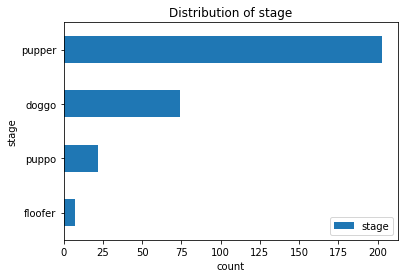

In [288]:
ax = stage_sorted.plot.barh()
plt.xlabel('count')
plt.ylabel('stage')
plt.title('Distribution of stage')
plt.show()

- The highest tweets were of dogs at stage 'Pupper'and the loweest were that of 'floofer'

#### Insight 2: Relationship between retweet_count and rating 



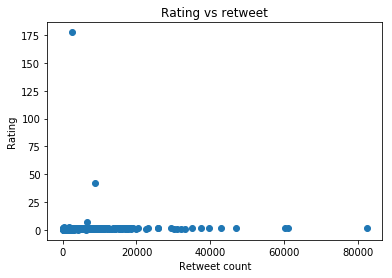

In [289]:
plt.scatter(final_df.retweet_count, final_df.rating)
plt.xlabel('Retweet count')
plt.ylabel('Rating')
plt.title('Rating vs retweet')
plt.show()

retweet_count and rating_numerator do not seem to have a relationship

#### Insight 3: Are more retweets due to more followers? Lets explore the relationship between retweet count and followers count

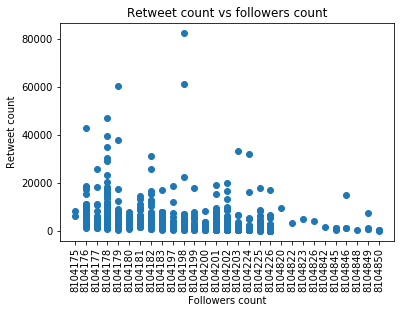

In [304]:
ax = plt.scatter( final_df.followers_count, final_df.retweet_count)
plt.xlabel('Followers count')
plt.ylabel('Retweet count')
plt.title('Retweet count vs followers count')
plt.xticks(rotation='vertical')
plt.show()

There seems to be no relationshiop between these two features 

#### Relationship between the favorites_count and retweet_count 

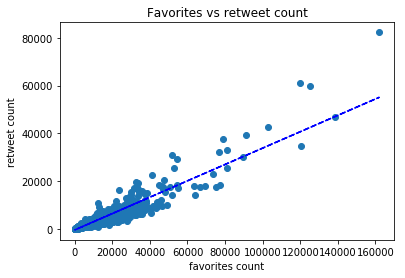

In [291]:
plt.scatter(final_df.favorites_count, final_df.retweet_count);
plt.xlabel('favorites count')
plt.ylabel('retweet count')
plt.title('Favorites vs retweet count');
x = final_df.favorites_count
z = np.polyfit(final_df.favorites_count, final_df.retweet_count, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")

plt.show()

These two features are strongly corrrelated to each other 

#### Insight 4: Most common used name in all the tweets in dataset

In [292]:
final_df.name.value_counts()

Charlie       10
Oliver        10
Cooper        10
Lucy          10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           7
Daisy          7
Toby           7
Stanley        6
Bo             6
Jax            6
Koda           6
Bella          6
Scout          5
Bailey         5
Buddy          5
Chester        5
Rusty          5
Oscar          5
Milo           5
Leo            5
Dave           5
Louis          5
Maggie         4
Cassie         4
Duke           4
Dexter         4
              ..
Norman         1
Lillie         1
Happy          1
Mairi          1
Donny          1
Brandonald     1
Saydee         1
Lance          1
Georgie        1
Bowie          1
Stella         1
Spark          1
Bell           1
Maisey         1
Mabel          1
Ginger         1
Jett           1
Keurig         1
Striker        1
Randall        1
Pip            1
Jim            1
Sam            1
Eevee          1
Nugget         1
Aubie          1
Meatball       1
Cilantro      

Charlie, Oliver, Lucy and COoper are the most common names of dogs in this dataset

##### Insight 5:  Rating distibution

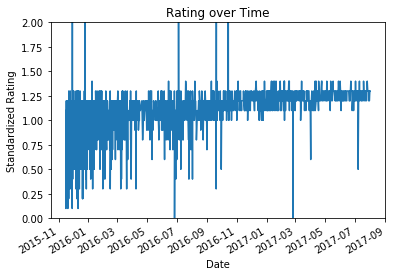

In [293]:
final_df.groupby('timestamp')['rating'].mean().plot(kind = 'line')
plt.ylim(0, 2)

plt.title('Rating over Time')
plt.xlabel('Date')
plt.ylabel('Standardized Rating')
plt.show()

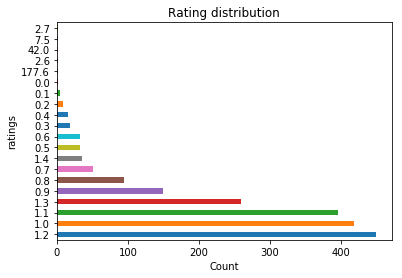

In [294]:
final_df.rating.value_counts().plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('ratings')
plt.title('Rating distribution');

#### Observation (Insights) : 
    
1. Number of ratings below 1( < 10 numberator ) are resonably high in 2015 and reduces thereafter 

2. Highest number of ratings have value 1.2 


In [295]:
final_df.rating.value_counts()

1.2      449
1.0      418
1.1      396
1.3      259
0.9      150
0.8       95
0.7       51
1.4       35
0.5       33
0.6       32
0.3       19
0.4       15
0.2        9
0.1        4
0.0        2
177.6      1
2.6        1
42.0       1
7.5        1
2.7        1
Name: rating, dtype: int64